In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [1]:
train.head()

NameError: name 'train' is not defined

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
test.isnull().sum()/len(test)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

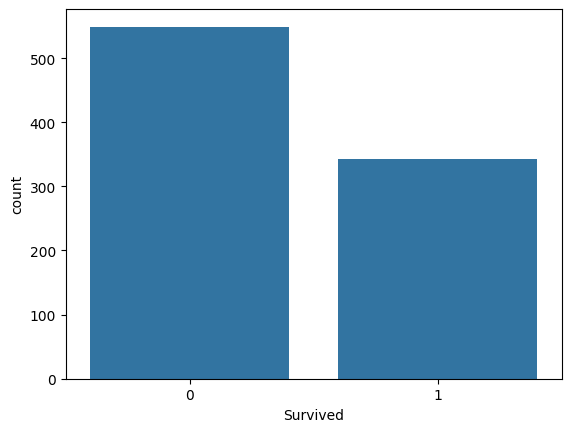

In [ ]:
sns.countplot(x="Survived", data=train)

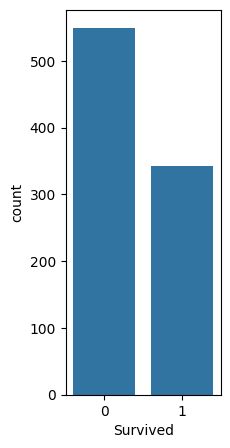

In [ ]:
plt.figure(figsize=(2,5))
sns.countplot(x="Survived", data=train)
plt.show()

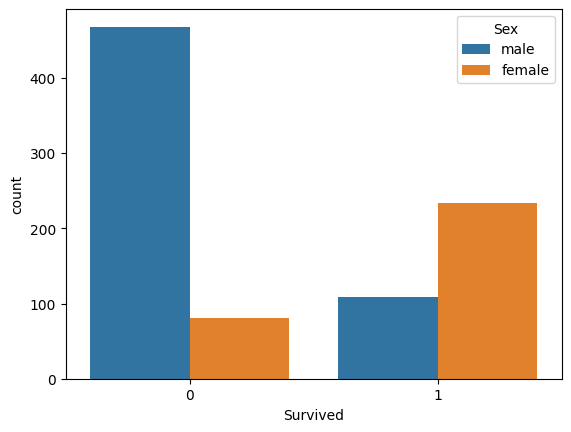

In [ ]:
sns.countplot(x='Survived', hue= 'Sex', data=train)
plt.show()

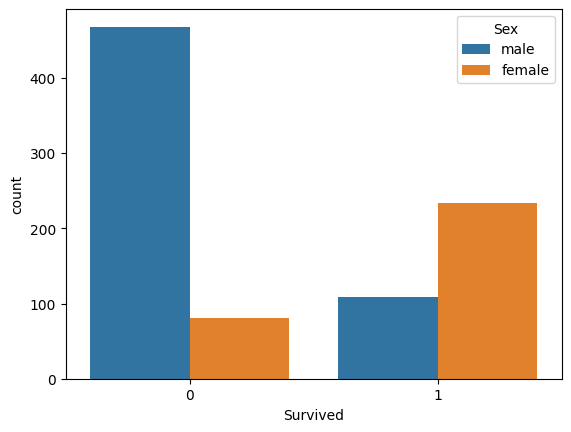

In [ ]:
y = np.linspace(0,100,2000)
sns.countplot(x='Survived', hue= 'Sex', data=train)
plt.show()

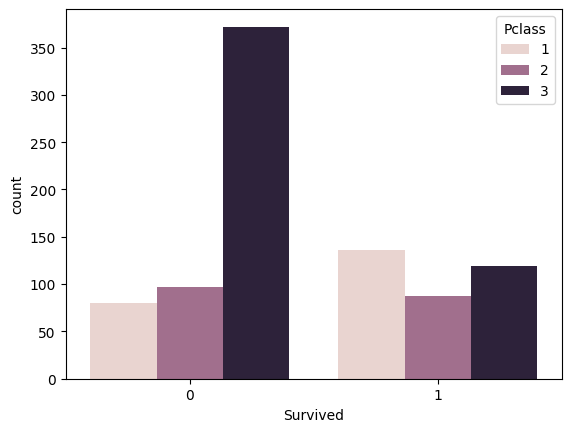

In [ ]:
sns.countplot(x='Survived', hue='Pclass',data=train)
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

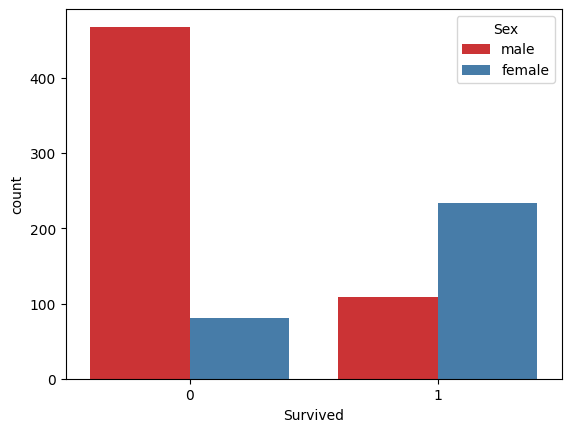

In [ ]:
sns.countplot(x='Survived', hue='Sex',palette='Set1', data=train)

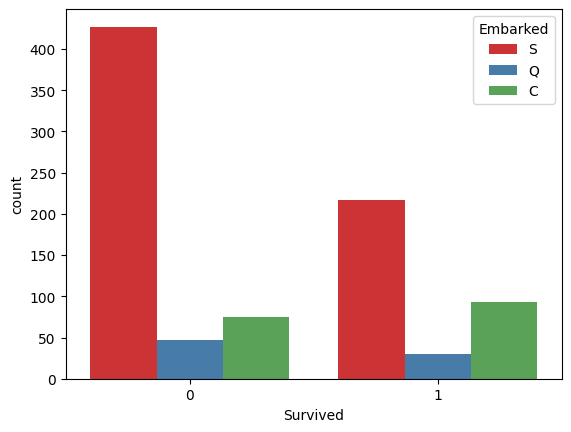

In [ ]:
sns.countplot(x='Survived', hue='Embarked', palette='Set1', data=train)
plt.show()

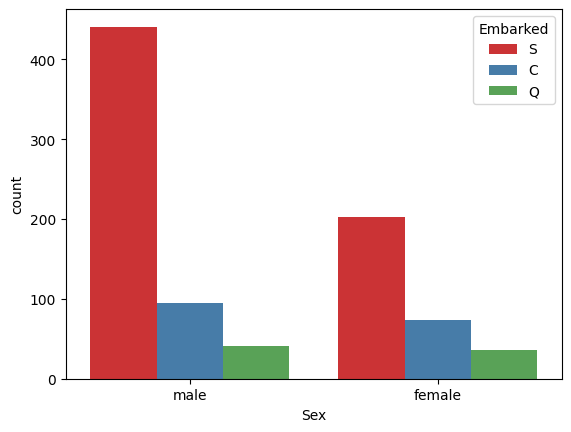

In [ ]:
sns.countplot(x='Sex', hue='Embarked', palette='Set1',data=train)
plt.show()

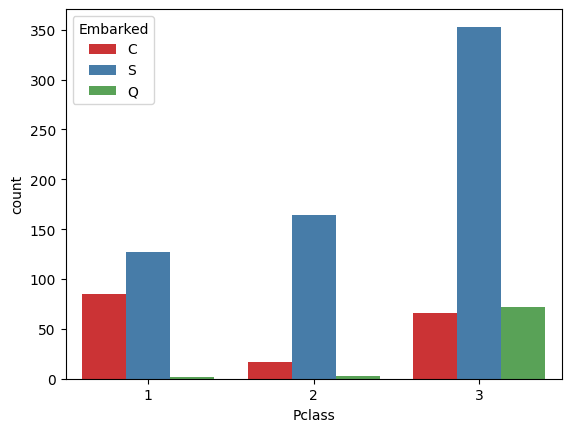

In [ ]:
sns.countplot(x='Pclass',hue='Embarked', palette='Set1', data=train)
plt.show()

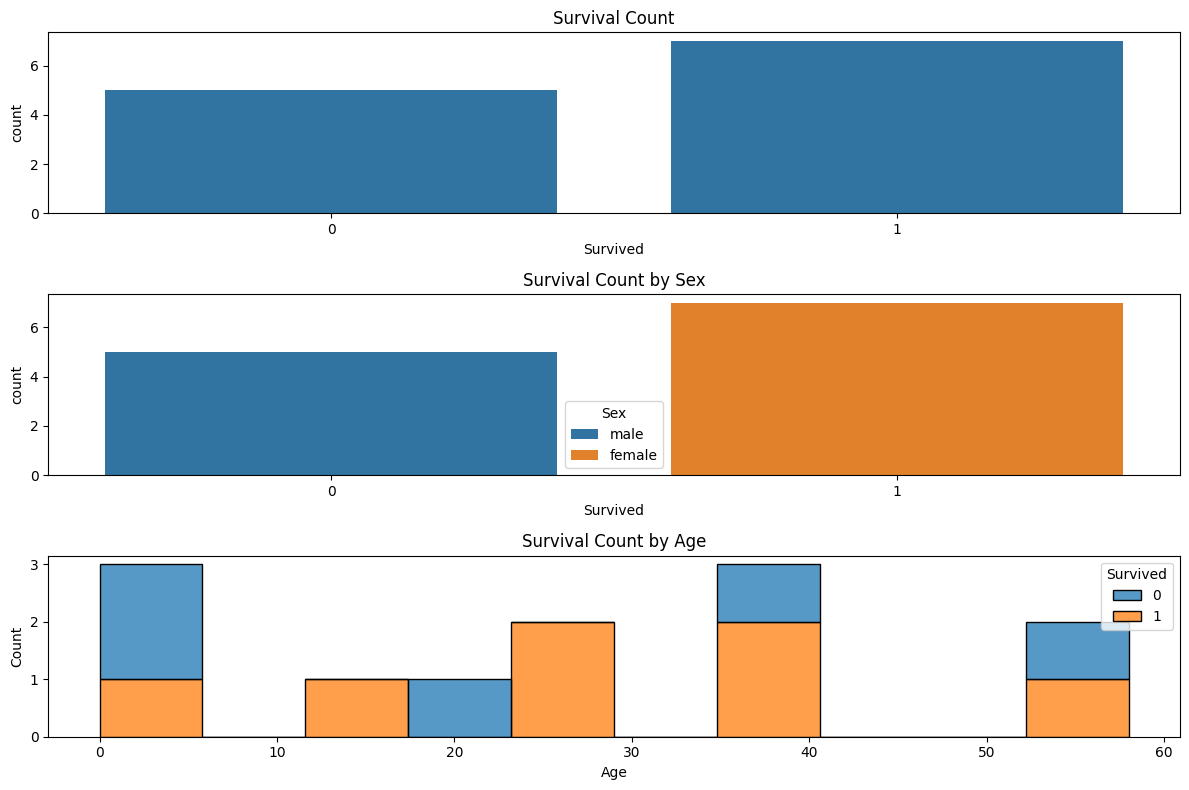

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already in a pandas DataFrame named 'df'
# If not, you should load your data into a DataFrame first

# Example data (part of the Titanic dataset)
data = {
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath',
             'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
             'Johnson, Mrs. Oscar W', 'Nasser, Mrs. Nicholas', 'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth'],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female'],
    'Age': [22, 38, 26, 35, 35, 0, 54, 2, 27, 14, 4, 58],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 8))

# Countplot for survival based on Name
plt.subplot(3, 1, 1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')

# Countplot for survival based on Sex
plt.subplot(3, 1, 2)
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')

# Countplot for survival based on Age (assuming bins)
plt.subplot(3, 1, 3)
sns.histplot(df, x='Age', hue='Survived', multiple='stack', bins=10)
plt.title('Survival Count by Age')

plt.tight_layout()
plt.show()


In [ ]:
cm = confusion_matrix(val_y,predictions)

NameError: name 'val_y' is not defined

In [ ]:
print(cm)

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('True Values')
plt.show()

In [ ]:
print("accuracy : ", (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))

In [ ]:
print("recall:",(cm[0,0])/(cm[0,0]+cm[1,0]))

In [ ]:
print("precision:",cm[0,0]/(cm[0,0]+cm[0,1]))

In [ ]:
print("specificity:",cm[1,1]/(cm[1,1]+cm[0,1]))

In [ ]:
print("F-score :", (2*cm[0,0]/2*cm[0,0]+cm[0,1]+cm[1,0]))

In [ ]:
print(classification_report(val_y,predictions))

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(val_y, predictions)

In [ ]:
roc_auc=auc(fpr,tpr)

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
ply.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()